In [28]:
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import *

from math import pi

In [29]:
myfont = FontProperties(fname=r'C:\Windows\Fonts\NotoSansCJKtc-Regular.otf')
#myfont = FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')
df = pd.read_excel(r'C:\Users\user\Documents\GitHub\scoreAnalyze\資優班成績分析\110-1-2G7評量成績.xls')

print(df)

     班級  座號   姓名      學號  國文   英語   數學     歷史   地理     公民  自然科學    加權總分  資優班排  \
0   701  11  蔡禹寬  110011  89   98   97   92.5   92  100.0    94  1418.5    19   
1   701  13  賴柏臻  110013  91   98   96   90.0  100  100.0   100  1445.0    12   
2   701  14  儲佑達  110014  94   99   98  100.0  100  100.0    96  1461.0     6   
3   702   8  劉信澤  110022  89  100   98   95.0  100   95.0    98  1445.0    12   
4   702  12  顏劭恩  110026  95  100   96   95.0  100  100.0   100  1468.0     3   
5   702  13  蘇治嘉  110027  96  100   94   97.5   90   92.5    95  1435.0    16   
6   703   1  王聖文  110028  89  100  100  100.0  100   97.5    93  1443.5    14   
7   703   5  周祐寬  110032  86   99   96   82.5   88   95.0    90  1378.5    23   
8   703  18  袁丞希  110272  92  100   96   97.5   95  100.0    98  1450.5     9   
9   704   1  王禹程  110041  97   97   94   97.5   98   95.0    95  1439.5    15   
10  704   2  王麒富  110042  88   97   96   90.0   96   95.0    96  1412.0    20   
11  704  18  許維辰  110285  93

In [30]:
df.columns

Index(['班級', '座號', '姓名', '學號', '國文', '英語', '數學', '歷史', '地理', '公民', '自然科學',
       '加權總分', '資優班排', '校排'],
      dtype='object')

In [31]:
df.iloc[0][['國文', '英語', '數學', '歷史', '地理', '公民', '自然科學']].values.flatten().tolist()

[89, 98, 97, 92.5, 92, 100.0, 94]

In [32]:
df.iloc[0]

班級         701
座號          11
姓名         蔡禹寬
學號      110011
國文          89
英語          98
數學          97
歷史        92.5
地理          92
公民         100
自然科學        94
加權總分    1418.5
資優班排        19
校排          33
Name: 0, dtype: object

# 

[0.2, 1.0975979010256551, 1.9951958020513103, 2.8927937030769657, 3.790391604102621, 4.687989505128276, 5.585587406153931, 0.2]


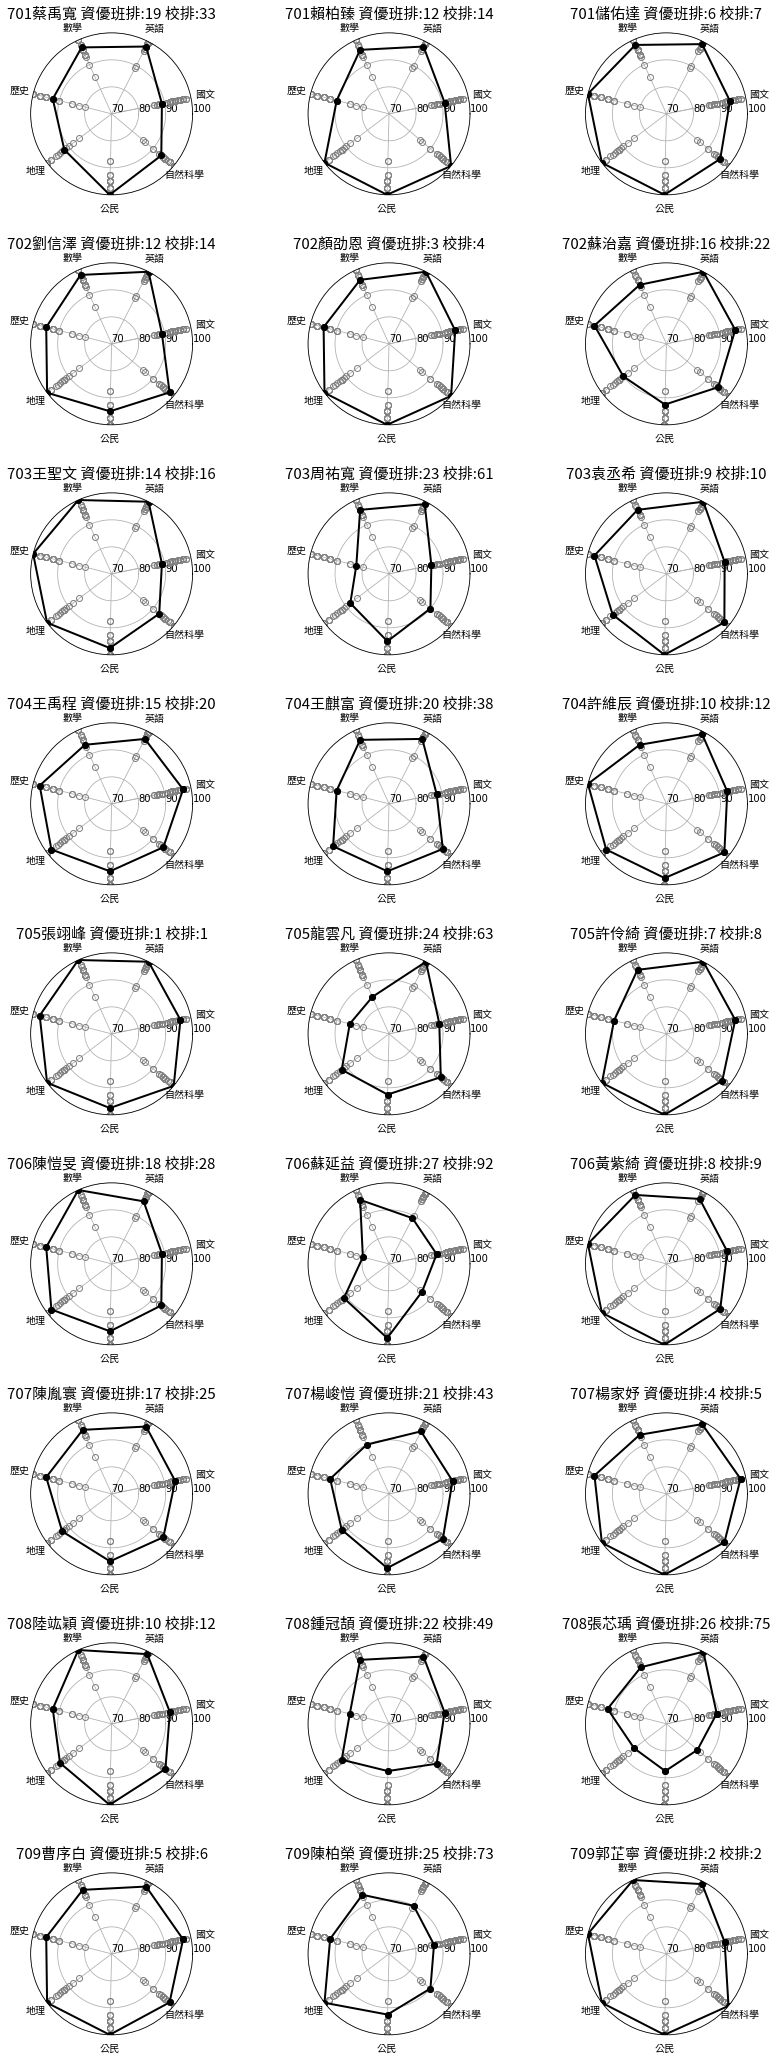

In [33]:
categories = ('國文', '英語', '數學', '歷史','地理','公民','自然科學')

N = len(categories)

angles = [(n / float(N) * 2 * pi)+.2 for n in range(N)]

angles += angles[:1]

print(angles)
fig, axs = plt.subplots(9, 3, 
                        subplot_kw=dict(projection="polar"),
                        figsize=(13,30),
                       )


#各小圖之間的間隔設定
fig.tight_layout(pad=6, w_pad=3, h_pad=3)

#ax = plt.subplot(111, polar=True)
for i in range(27):

    #plt.xticks(angles[:-1], categories, color='black', size=8, fontproperties = myfont)
    #axs[int(i/3),i%3].set_xticklabels(angles[:-1], categories, color='black',size=8, fontproperties = myfont)
    axs[int(i/3),i%3].set_rlabel_position(0)

    #plt.ylim(80,150)
    #plt.yticks([80,100,120,140], ["80","100","120","140"], color="black", size=7)
    #axs[int(i/3),i%3].set_yticks([80,100,120,140], ["80","100","120","140"])
    axs[int(i/3),i%3].set_ylim(70,100)
    axs[int(i/3),i%3].set_yticks([70,80,90,100])
    axs[int(i/3),i%3].set_yticklabels(['70','80','90','100'])
    
    axs[int(i/3),i%3].set_xticks(angles)
    axs[int(i/3),i%3].set_xticklabels(categories,fontproperties = myfont)
    
    

    #畫全部學生
    for index, row in df.iterrows():
        #scores = (row['數學性向'], row['自然性向'])
        #scores = (row[['數學性向', '數學能力', '數學實作', '自然性向', '自然能力','自然實作']])
        #scores = (row[['數學性向', '自然性向','數學能力', '自然能力', '數學實作',  '自然實作']])
        scores = row[['國文', '英語', '數學', '歷史','地理','公民','自然科學','國文']].values.flatten().tolist()
        #plt.plot(scores,color='lightgray', linestyle=':')
        axs[int(i/3),i%3].plot(angles, scores, linewidth=0, color='gray',  marker='o',markeredgecolor='gray',markerfacecolor='none')
    #ax.fill(angles, values, 'b', alpha=0.1)

    #畫單一學生

    data = df.iloc[i]
    single_scores = data[['國文', '英語', '數學', '歷史','地理','公民','自然科學','國文']].values.flatten().tolist()
    axs[int(i/3),i%3].plot(angles, single_scores, linewidth=2, color='black', linestyle='-',marker='o')



    title = str(data['班級'])+data['姓名']+' 資優班排:'+str(data['資優班排'])+' 校排:'+str(data['校排'])
    #title = 'test'
    axs[int(i/3),i%3].set_title(title,fontproperties = myfont,fontsize= 15)


plt.show()
fig.savefig('資優班段考A2分析.png',dpi = 250)


['var1', 'var2', 'var3', 'var4', 'var5']
[38.0, 29, 8, 7, 28, 38.0]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]


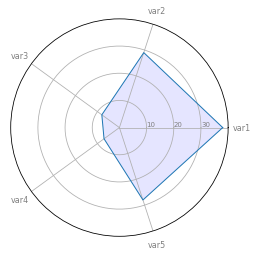

In [36]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
print(categories)
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
print(values)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
print(angles)
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

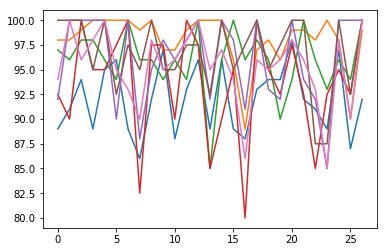

In [11]:

plt.plot(df[['國文', '英語', '數學', '歷史','地理','公民','自然科學']])

In [26]:
df[['國文', '英語', '數學', '歷史','地理','公民','自然科學']]

,國文,英語,數學,歷史,地理,公民,自然科學
0,89,98,97,92.5,92,100.0,94
1,91,98,96,90.0,100,100.0,100
2,94,99,98,100.0,100,100.0,96
3,89,100,98,95.0,100,95.0,98
4,95,100,96,95.0,100,100.0,100
5,96,100,94,97.5,90,92.5,95
6,89,100,100,100.0,100,97.5,93
7,86,99,96,82.5,88,95.0,90
8,92,100,96,97.5,95,100.0,98
9,97,97,94,97.5,98,95.0,95
